In [3]:
# import zipfile
# with zipfile.ZipFile('./Image_classification_data.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

In [26]:
import numpy as np 
from sklearn.model_selection import train_test_split 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('./data_labels_mainData.csv') 

In [10]:
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [7]:
data.count() #no missing values

InstanceID      9896
patientID       9896
ImageName       9896
cellTypeName    9896
cellType        9896
isCancerous     9896
dtype: int64

In [23]:
#drop IDs
data.drop(['InstanceID', 'patientID'], axis = 1, inplace =True)

In [24]:


  

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) 

train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42) 

  

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0])) 

Train data : 5937, Val Data: 1979, Test Data: 1980


In [25]:
train_data.head()


,ImageName,cellTypeName,cellType,isCancerous
9533,22266.png,fibroblast,0,0
310,18717.png,others,3,0
9480,21202.png,inflammatory,1,0
7073,18114.png,fibroblast,0,0
8977,14070.png,epithelial,2,1


(array([3459., 2478.,    0.]),
 array([0, 1, 2, 3]),
 <BarContainer object of 3 artists>)

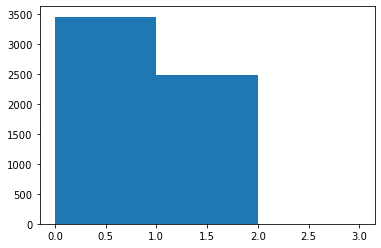

In [33]:
target = train_data['isCancerous']

plt.hist(target, bins=np.arange(4)) #change it to have gaps and not use decimals

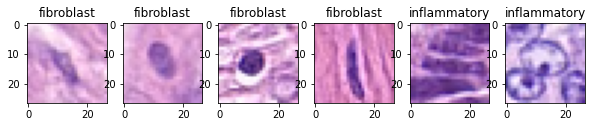

In [40]:
from PIL import Image

label_names = {'fibroblast':0, 'inflammatory':1, 'epithelial':2, 'others':3}
d_inv = {v: k for k, v in label_names.items()}

img_list = list('./patch_images/' + train_data['ImageName'])
target_list = list(target)
fig = plt.figure(figsize = [10, 10])

for i in np.arange(6):
    plt.subplot(1, 6, i + 1)
    img = Image.open(img_list[i])
    
    plt.imshow(img)
    plt.title(d_inv[target_list[i]])


In [41]:
img = Image.open(img_list[100])
img_numpy = np.ascontiguousarray(img, dtype=np.float32)
print('Image size \nH:{} W:{} C:{}'.format(img_numpy.shape[0], img_numpy.shape[1], img_numpy.shape[2]))

Image size 
H:27 W:27 C:3
